# A2Q1: SparseMatMult

In [9]:
import numpy as np
from scipy.sparse import dok_matrix, csr_matrix
from copy import deepcopy
import matplotlib.pyplot as plt

In [12]:
def SparseMatMult(G, x):
    '''
      y = SparseMatMult(G, x)
      
      Multiplies a vector (x) by a sparse matrix G,
      such that y = G @ x .
      
      Inputs:
        G is an NxM dictionary-of-keys (dok) sparse matrix
        x is an M-vector
      
      Output:
        y is an N-vector
    '''
    rows,cols = G.nonzero()
    Nrows,Ncols = np.shape(G)
    y = np.zeros(Nrows)

    # === YOUR CODE HERE
    for i in range(Nrows):
        for j in range(Ncols):
            y[i] += G[i, j] * x[i]
    return y

# A2Q2: Page Rank

In [198]:
def PageRank(G, alpha):
    '''
     p, iters = PageRank(G, alpha)

     Computes the Google Page-rank for the network in the adjacency matrix G.
     
     Note: This function never forms a full RxR matrix, where R is the number
           of node in the network.

     Input
       G     is an RxR adjacency matrix, G[i,j] = 1 iff node j projects to node i
             Note: G must be a dictionary-of-keys (dok) sparse matrix
       alpha is a scalar between 0 and 1

     Output
       p     is a probability vector containing the Page-rank of each node
       iters is the number of iterations used to achieve a change tolerance
             of 1e-8 (changes to elements of p are all smaller than 1e-8)

     [-1] if code is not readable
    '''
    
    R = np.shape(G)[0]  # R = Number of nodes
    p = np.zeros(R, dtype=float)
    iters = 0

    # === YOUR CODE HERE ===
    outlinks = np.sum(G, 0)
    outlinks = np.asarray(outlinks)[0]
    d = np.zeros(R)
    for i in range(R):
        if outlinks[i] == 0:
            d[i] = 1
            
    D = 1/(outlinks)
    P = SparseMatMult(G, D)
    e = np.ones(R)
    p = np.ones(R)/R  #init possibility
    
    err = 1
    count = 0
    while err > 1e-8 and count < 7777:
        Mx = alpha * (P*p + e*(d*p)/R) + (1 - alpha)/R*e
        err = np.linalg.norm(p - Mx, np.inf)
        p = Mx
        count = count + 1
    
    iters = count
    if iters == 7777:
        p = -1
    return p, iters

# A2Q3: Illegal Trading Network

## (a) Create sparse matrix

In [199]:
# === YOUR CODE HERE ===
G = dok_matrix((12,12))
A = 0
B = 1
C = 2
D = 3
E = 4
F = 5
#G = 6
H = 7
I = 8
J = 9
K = 10
L = 11
G[1, 0] = 38
G[2, 0] = 38
G[4, 0] = 24
G[0, 1] = 6
G[2, 1] = 41
G[5, 1] = 53
G[0, 2] = 47
G[1, 2] = 29
G[3, 2] = 24
G[2, 3] = 8
G[4, 3] = 42
G[5, 3] = 50
G[0, 4] = 9
G[3, 4] = 4
G[5, 4] = 9
G[6, 4] = 39
G[11, 4] = 39
G[1, 5] = 9
G[3, 5] = 28
G[4, 5] = 19
G[7, 5] = 22
G[11, 5] = 22
G[4, 6] = 13
G[7, 6] = 17
G[8, 6] = 23
G[11, 6] = 20
G[9, 6] = 27
G[5, 7] = 15
G[6, 7] = 21
G[8, 7] = 21
G[9, 7] = 10
G[10, 7] = 18
G[11, 7] = 15
G[6, 8] = 24
G[7, 8] = 24
G[9, 8] = 32
G[10, 8] = 20
G[6, 9] = 30
G[7, 9] = 40
G[8, 9] = 5
G[10, 9] = 25
G[7, 10] = 33
G[8, 10] = 7
G[9, 10] = 60
G[6, 11] = 24
G[7, 11] = 24
G[9, 11] = 32
G[10, 11] = 20


## (b) Run PageRank on network

/srv/jupyter_venv/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in multiply
/srv/jupyter_venv/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in multiply


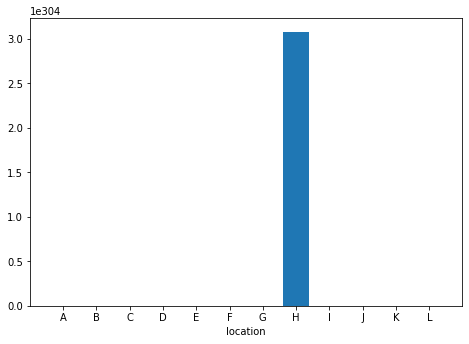

In [201]:
# === YOUR CODE HERE ===
p, iters = PageRank(G, 1)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
a = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]
ax.bar(a,p)
plt.xlabel('location')
plt.ylabel('probability')
plt.show()

## (c) Note to police

YOUR COMMENTS HERE
H is the most influential place